In [152]:
import numpy as np
import matplotlib.pyplot as plt

### The Function

In [153]:
def f(x):
  return x**2 - 2

def df(x):
  return 2*x

In [154]:
tolerance = 1e-7
maximum_iter = 3

### Bisection Method

In [155]:
def bisection(a, b, tolerance, maximum_iter):

  points = []

  # If the enpoints are zero, then they are a root
  if abs(f(a)) < tolerance:
    return a, [a]
  if abs(f(b)) < tolerance:
    return b, [b]

  # Check that the method can be applied
  if f(a)*f(b) > 0:
    print("Error: f(a) and f(b) do not have opposite signs.")
    return None, []

  # Loop over a maximum number of iterations
  for i in range(maximum_iter):
    mid = (a+b)/2
    points.append(mid)

    # If f(mid) is zero, then it is a root
    if abs(f(mid)) < tolerance or abs(b-a) < tolerance:
      return mid, points
    # Otherwise, if f(a) and f(mid) same sign, then mid is new endpoint a
    elif f(a)*f(mid) > 0:
      a = mid
    # Else, mid is the new endpoint b
    else:
      b = mid

  print("Error: Root not found within tolerance for the maximum iterations.")
  return None, points

### Newton's Method

In [156]:
def newton(x0, tolerance, maximum_iter):

  points = [x0]

  # Loop over a maximum number of iterations
  for i in range(maximum_iter):

    # If the derivative at x0 is zero, then divide by zero error
    if abs(df(x0)) < 1e-10:
      print("Error: Derivative is zero.")
      return None, points

    # Main step: x0, f(x0), and df(x0) gives the next approximation
    xnew = x0 - (f(x0)/df(x0))
    points.append(xnew)

    # If f(xnew) is zero, then it is the root
    if abs(f(xnew)) < tolerance or abs(xnew-x0) < tolerance:
      return xnew, points

    # xnew is the next x0 guess
    x0 = xnew

  print("Error: Root not found.")
  return None, points

### Testing

In [157]:
value = bisection(1, 2, tolerance, maximum_iter)
print(value)

Error: Root not found within tolerance for the maximum iterations.
(None, [1.5, 1.25, 1.375])


In [158]:
newvalue = newton(3, tolerance, maximum_iter)
print(newvalue)

Error: Root not found.
(None, [3, 1.8333333333333333, 1.4621212121212122, 1.4149984298948028])


### Plotting Points

Error: Root not found within tolerance for the maximum iterations.
Error: Root not found.


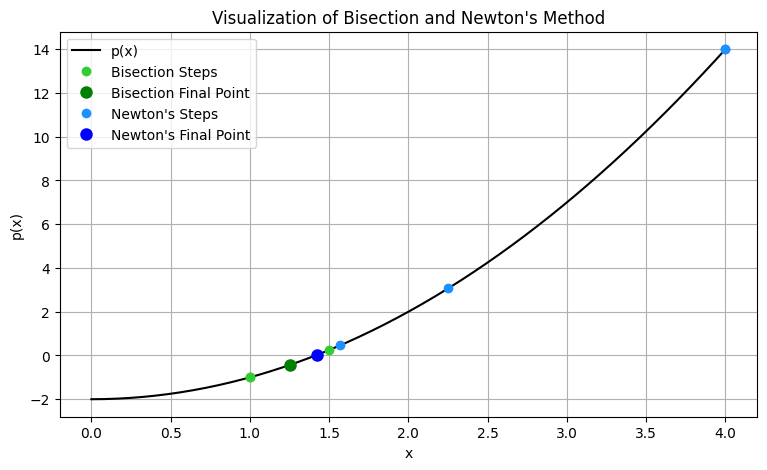

In [170]:
bisect_root, bisect_points = bisection(0, 2, tolerance, maximum_iter)
newton_root, newton_points = newton(4, tolerance, maximum_iter)

# print(bisect_root)
# print(bisect_points)
# print(newton_root)
# print(newton_points)

plt.figure(figsize=(9, 5))

x = np.linspace(0, 4, 200)
y = f(x)

plt.plot(x, f(x), color='k', label='p(x)')

# Plotting the bisection points + final point larger + label for just one point
for i in bisect_points:
  plt.plot(i, f(i), 'o', color='limegreen')
  if i == bisect_points[0]:
    plt.plot(i, f(i), 'o', color='limegreen', label='Bisection Steps')

plt.plot(bisect_points[-1], f(bisect_points[-1]), 'o', color='g', markersize=8, label='Bisection Final Point')

# Plotting the newton points + final point larger + label for just one point
for i in newton_points:
  plt.plot(i, f(i), 'o', color='dodgerblue')
  if i == newton_points[0]:
    plt.plot(i, f(i), 'o', color='dodgerblue', label="Newton's Steps")

plt.plot(newton_points[-1], f(newton_points[-1]), 'o', color='b', markersize=8, label="Newton's Final Point")

# Labels and final parts

plt.xlabel('x')
plt.ylabel('p(x)')
plt.title("Visualization of Bisection and Newton's Method")

plt.grid(True)
plt.legend()
plt.show()